In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

!unzip drive/"My Drive"/korat_sauce/all_sauce3.zip

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import os
import imutils

from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score ,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from os import listdir
from os.path import isfile, join
import tensorflow

In [3]:
rawImages = []
labels = []

In [4]:
mypath = 'all_sauce/'
imagePaths = [mypath+f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
batch_size = 32
num_classes = 4
epochs = 16
data_augmentation = True
num_predictions = 20
width = 150
height = 150
#images = np.empty((0, 150,150,3))
labels = []
rawImage = []

In [6]:
except_pic =[]
for i in range(217,240):
   except_pic.append("all_sauce/ocean."+str(i)+".jpg")
for i in range(454,477):
   except_pic.append("all_sauce/ocean."+str(i)+".jpg")

In [7]:
count_pass = 0
for (i, imagePath) in enumerate(imagePaths):
    if(imagePath in except_pic):
      count_pass +=1
      continue
    image = cv2.imread(imagePath)
    label = imagePath.split('/')[1].split('.')[0]
    image = cv2.resize(image, (width,height))
    
    #images = np.append(images, [image], axis=0)
    labels.append(label)
    rawImage.append(image)
    
    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))
print("pass = ",count_pass)

[INFO] processed 1000/3968
[INFO] processed 2000/3968
[INFO] processed 3000/3968
pass =  46


In [8]:
images_array = np.array(rawImage)
images_array.shape

(3922, 150, 150, 3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images_array, np.array(labels), test_size=0.2,random_state=1)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [15]:
seq_model = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True)

Epoch 1/16
74/74 [==============================] - 104s 1s/step - loss: 0.4698 - accuracy: 0.5791 - val_loss: 0.5281 - val_accuracy: 0.5618
Epoch 2/16
74/74 [==============================] - 105s 1s/step - loss: 0.2583 - accuracy: 0.7997 - val_loss: 0.1484 - val_accuracy: 0.8943
Epoch 3/16
74/74 [==============================] - 105s 1s/step - loss: 0.1715 - accuracy: 0.8724 - val_loss: 0.2136 - val_accuracy: 0.8217
Epoch 4/16
74/74 [==============================] - 106s 1s/step - loss: 0.1336 - accuracy: 0.9052 - val_loss: 0.1136 - val_accuracy: 0.9261
Epoch 5/16
74/74 [==============================] - 105s 1s/step - loss: 0.1037 - accuracy: 0.9324 - val_loss: 0.0885 - val_accuracy: 0.9312
Epoch 6/16
74/74 [==============================] - 105s 1s/step - loss: 0.0852 - accuracy: 0.9439 - val_loss: 0.0660 - val_accuracy: 0.9516
Epoch 7/16
74/74 [==============================] - 105s 1s/step - loss: 0.0726 - accuracy: 0.9498 - val_loss: 0.0728 - val_accuracy: 0.9490
Epoch 8/16
74

In [16]:
value = model.predict(X_test)
y_pred =np.argmax(value,axis=1)
y_true = np.argmax(y_test,axis=1)

In [17]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       198
           1       0.97      0.94      0.96       206
           2       0.98      0.97      0.98       202
           3       0.97      1.00      0.99       179

    accuracy                           0.97       785
   macro avg       0.97      0.97      0.97       785
weighted avg       0.97      0.97      0.97       785



In [18]:
import pandas as pd
metrics = pd.DataFrame(seq_model.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.469811,0.579082,0.528112,0.561783
1,0.258288,0.799745,0.148447,0.894267
2,0.171490,0.872449,0.213649,0.821656
3,0.133649,0.905187,0.113643,0.926115
4,0.103721,0.932398,0.088477,0.931210
5,0.085177,0.943878,0.065957,0.951592
6,0.072616,0.949830,0.072796,0.949045
7,0.075230,0.957058,0.144483,0.913376
8,0.056576,0.972789,0.062369,0.963057
9,0.048422,0.970238,0.113778,0.917197


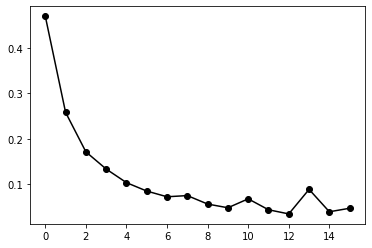

In [19]:
import matplotlib.pyplot as plt
plt.plot(list(seq_model.history.values())[0],'k-o')

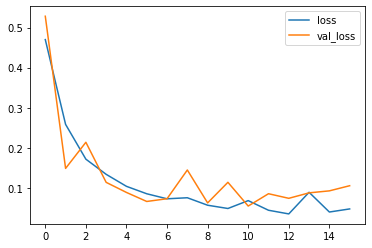

In [20]:
metrics[['loss', 'val_loss']].plot()

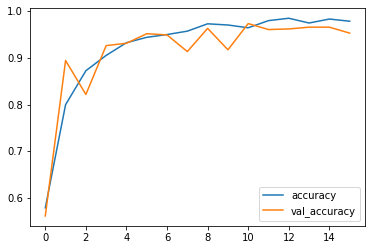

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

(1, 150, 150, 3)


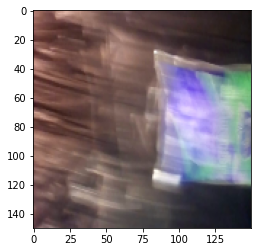

[9.9990344e-01 3.8258604e-06 1.0194313e-08 3.1974614e-03]
0.99990344
[0]


In [22]:
#######
img_path = 'all_sauce/maeyupa.9.jpg'
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np
#img = image.load_img(img_path, target_size=(150, 150))
#img_tensor = image.img_to_array(img)
#img_tensor = np.expand_dims(img_tensor, axis=0)
#img_tensor = img_tensor.astype('float32')
img_list = []
image = cv2.imread(img_path)
image = cv2.resize(image, (width,height))
img_list.append(image)
img_list = np.array(img_list)
img_list = img_list.astype('float32')


# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_list /= 255.
# Its shape is (1, 150, 150, 3)

print(img_list.shape)

plt.imshow(img_list[0])
#plt.imshow(X_test[0])
plt.show()

prediction = model.predict(np.array([img_list[0]]))
#prediction = model.predict(np.array([X_test[0]]))
print(prediction[0])
print(max(prediction[0]))
y_classes = prediction.argmax(axis=-1)
print(y_classes)

In [23]:
 from google.colab import drive
drive.mount('/content/drive')

!unzip drive/"My Drive"/korat_sauce/test_all_sauce2.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  drive/My Drive/korat_sauce/test_all_sauce2.zip
   creating: New folder/
  inflating: New folder/all.108.zapnuerchick.jpg  
  inflating: New folder/all.1099.maeyupa.jpg  
  inflating: New folder/all.110.zapnuerchick.jpg  
  inflating: New folder/all.1100.maeyupa.jpg  
  inflating: New folder/all.1132.jpg  
  inflating: New folder/all.1133.jpg  
  inflating: New folder/all.1165.zapnuer.jpg  
  inflating: New folder/all.1166.zapnuer.jpg  
  inflating: New folder/all.12.ocean.jpg  
  inflating: New folder/all.13.ocean.jpg  
  inflating: New folder/all.131.maeyupa.jpg  
  inflating: New folder/all.134.maeyupa.jpg  
  inflating: New folder/all.219.maeyupa.jpg  
  inflating: New folder/all.220.maeyupa.jpg  
  inflating: New folder/all.242.zapnuerchick.jpg  
  inflating: New folder/all.243.zapnuerchick.jpg  
  inflating: New folder/all.264.ocean.jpg  
  inf

In [24]:
mypath_test = 'New folder/'
imagePaths_test = [mypath_test+f for f in listdir(mypath_test) if isfile(join(mypath_test, f))]

In [25]:
#######
for (i, img_path) in enumerate(imagePaths_test):
  #img_path = 'all_sauce/ocean.'+str(i)+'.jpg'
  img_list = []
  image = cv2.imread(img_path)
  image = cv2.resize(image, (width,height))
  img_list.append(image)
  img_list = np.array(img_list)
  img_list = img_list.astype('float32')


  # Remember that the model was trained on inputs
  # that were preprocessed in the following way:
  img_list /= 255.
  # Its shape is (1, 150, 150, 3)

  print(img_list.shape)
  print(img_path)

  #plt.imshow(img_list[0])
  #plt.imshow(X_test[0])
  #plt.show()

  prediction = model.predict(np.array([img_list[0]]))
  #prediction = model.predict(np.array([X_test[0]]))
  print(prediction[0])
  print(max(prediction[0]))
  y_classes = prediction.argmax(axis=-1)
  print(y_classes)
  print("#####")

(1, 150, 150, 3)
New folder/all.903.ocean.jpg
[8.713147e-01 9.754658e-03 5.674958e-04 5.788803e-04]
0.8713147
[0]
#####
(1, 150, 150, 3)
New folder/all.1100.maeyupa.jpg
[9.9999940e-01 2.5355308e-07 3.7726636e-16 1.3277188e-12]
0.9999994
[0]
#####
(1, 150, 150, 3)
New folder/all.536.ocean.jpg
[3.9445969e-01 6.4270198e-03 1.8618719e-05 3.9989996e-01]
0.39989996
[3]
#####
(1, 150, 150, 3)
New folder/all.462.ocean.jpg
[9.8749024e-01 3.1140149e-03 1.9698960e-05 6.5994263e-04]
0.98749024
[0]
#####
(1, 150, 150, 3)
New folder/all.242.zapnuerchick.jpg
[3.5249377e-06 4.1852022e-11 4.2911847e-06 9.9983501e-01]
0.999835
[3]
#####
(1, 150, 150, 3)
New folder/all.487.zapnuerchick.jpg
[8.7371433e-08 3.3935992e-12 3.2023023e-11 9.9999940e-01]
0.9999994
[3]
#####
(1, 150, 150, 3)
New folder/all.339.zapnuerchick.jpg
[2.1681569e-07 1.6981230e-12 2.9300362e-10 9.9999768e-01]
0.9999977
[3]
#####
(1, 150, 150, 3)
New folder/all.902.ocean.jpg
[6.6211122e-01 9.9484026e-03 4.5784136e-06 6.7457557e-04]
0.66211

In [26]:
model.save_weights("train_sauce.h5")